In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [17]:
import nltk
nltk.download('punkt_tab')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
# Download the required resource
nltk.download('maxent_ne_chunker_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [18]:
# read in data

In [19]:
import pandas as pd

try:
    df = pd.read_csv('amazon_oral_care_reviews_specific.csv', on_bad_lines='skip', engine='python') # skip bad lines, switch to Python engine
except pd.errors.ParserError as e:
    print(f"Error occurred at line: {e}")
    # If the 'skip' approach doesn't work, manually inspect and fix the problematic line in your CSV file

In [20]:
df.shape

(1000, 10)

In [21]:
df1=df.head(500)
print(df1.shape)

(500, 10)


In [22]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,PROD611,USER4021,Whitney Solis,0,41,4,2023-02-04 11:34:00,Noticed a difference in a week,Gentle on my gums and perfect for daily use. W...
1,2,PROD220,USER6742,Carlos Johnston,13,13,1,2020-04-25 09:42:04,Improved gum health,"My dentist suggested this product, and I can s..."
2,3,PROD315,USER5041,Janet Franco,6,29,3,2016-04-16 07:53:21,Keeps breath fresh all day,The electric toothbrush is a game changer. My ...
3,4,PROD104,USER1146,Brenda Johnson,1,43,5,2008-09-26 20:18:08,Best toothpaste I've used,Affordable and works as advertised. My teeth f...
4,5,PROD382,USER6387,Charles Davis,2,2,1,2013-03-04 23:46:35,Keeps breath fresh all day,Easy to use and leaves my mouth feeling super ...


In [23]:
# eda

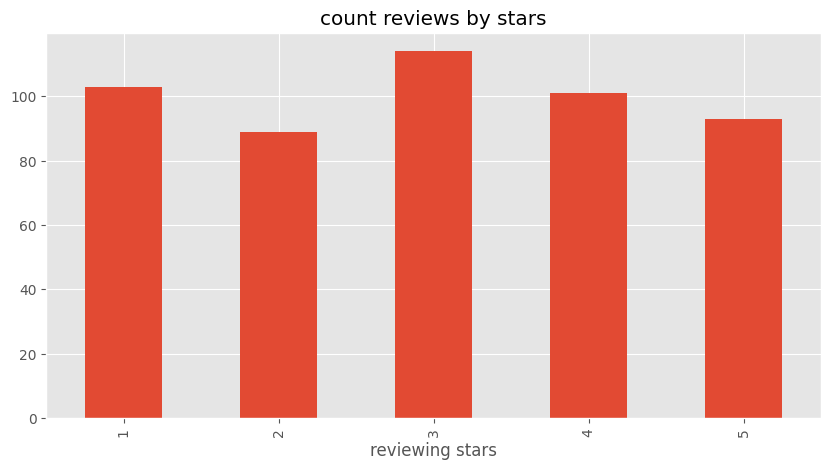

In [24]:
ax = df1['Score'].value_counts().sort_index().plot(kind='bar',title='count reviews by stars',figsize=(10,5))
ax.set_xlabel('reviewing stars')
plt.show()

In [25]:
# basic nltk

In [26]:
example = df1['Text'][50]
print(example)

The electric toothbrush is a game changer. My teeth have never felt this clean, even after a dentist visit.


In [27]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The',
 'electric',
 'toothbrush',
 'is',
 'a',
 'game',
 'changer',
 '.',
 'My',
 'teeth']

In [28]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('electric', 'JJ'),
 ('toothbrush', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('game', 'NN'),
 ('changer', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('teeth', 'NNS')]

In [29]:
!pip install svgling
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00
(S
  The/DT
  electric/JJ
  toothbrush/NN
  is/VBZ
  a/DT
  game/NN
  changer/NN
  ./.
  My/PRP$
  teeth/NNS
  have/VBP
  never/RB
  felt/VBN
  this/DT
  clean/NN
  ,/,
  even/RB
  after/IN
  a/DT
  dentist/JJ
  visit/NN
  ./.)


In [30]:
# vader sentiment score

In [31]:
'''
bag of words approach
stop words remove
each word is scored and combined to total score
'''

'\nbag of words approach\nstop words remove\neach word is scored and combined to total score\n'

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sia = SentimentIntensityAnalyzer()

In [36]:
sia.polarity_scores('You nigga i hate you')   # negative rating

{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}

In [37]:
sia.polarity_scores('Jingle Bells Jingle Bells')    # neutral rating

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [38]:
sia.polarity_scores('Such a outstanding look')    # positive rating

{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.6124}

In [39]:
# now do it for example variable created before from dataset reviews

In [40]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.481}

In [41]:
# now run polarity scores for all dataset

In [42]:
result={}
for i,row in tqdm(df1.iterrows(),total=len(df1)):
  text = row['Text']
  myid = row['Id']
  result[myid]= sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [43]:
vaders = pd.DataFrame(result)
vaders = vaders.transpose()
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df1,how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.569,0.431,0.8442,PROD611,USER4021,Whitney Solis,0,41,4,2023-02-04 11:34:00,Noticed a difference in a week,Gentle on my gums and perfect for daily use. W...
1,2,0.0,0.819,0.181,0.4767,PROD220,USER6742,Carlos Johnston,13,13,1,2020-04-25 09:42:04,Improved gum health,"My dentist suggested this product, and I can s..."
2,3,0.0,0.837,0.163,0.4810,PROD315,USER5041,Janet Franco,6,29,3,2016-04-16 07:53:21,Keeps breath fresh all day,The electric toothbrush is a game changer. My ...
3,4,0.0,0.794,0.206,0.3818,PROD104,USER1146,Brenda Johnson,1,43,5,2008-09-26 20:18:08,Best toothpaste I've used,Affordable and works as advertised. My teeth f...
4,5,0.0,0.353,0.647,0.8750,PROD382,USER6387,Charles Davis,2,2,1,2013-03-04 23:46:35,Keeps breath fresh all day,Easy to use and leaves my mouth feeling super ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.0,0.837,0.163,0.4810,PROD441,USER2313,Bryan Houston,31,31,4,2018-06-04 16:37:28,Highly recommended by dentists,The electric toothbrush is a game changer. My ...
496,497,0.0,0.357,0.643,0.9118,PROD349,USER6360,Samantha Fox,7,7,2,2018-06-12 23:16:34,Cleans teeth effectively,Natural ingredients make it safe and effective...
497,498,0.0,0.837,0.163,0.4810,PROD964,USER5847,Sharon Taylor,19,19,1,2009-08-07 22:14:25,Perfect for sensitive teeth,The electric toothbrush is a game changer. My ...
498,499,0.0,0.357,0.643,0.9118,PROD219,USER2534,Brianna Davis,3,3,4,2011-01-10 05:13:20,Great value for money,Natural ingredients make it safe and effective...


In [44]:
vaders.head()
# now we've sentiment scores and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.569,0.431,0.8442,PROD611,USER4021,Whitney Solis,0,41,4,2023-02-04 11:34:00,Noticed a difference in a week,Gentle on my gums and perfect for daily use. W...
1,2,0.0,0.819,0.181,0.4767,PROD220,USER6742,Carlos Johnston,13,13,1,2020-04-25 09:42:04,Improved gum health,"My dentist suggested this product, and I can s..."
2,3,0.0,0.837,0.163,0.4810,PROD315,USER5041,Janet Franco,6,29,3,2016-04-16 07:53:21,Keeps breath fresh all day,The electric toothbrush is a game changer. My ...
3,4,0.0,0.794,0.206,0.3818,PROD104,USER1146,Brenda Johnson,1,43,5,2008-09-26 20:18:08,Best toothpaste I've used,Affordable and works as advertised. My teeth f...
4,5,0.0,0.353,0.647,0.8750,PROD382,USER6387,Charles Davis,2,2,1,2013-03-04 23:46:35,Keeps breath fresh all day,Easy to use and leaves my mouth feeling super ...


In [45]:
## plot vader results

<function matplotlib.pyplot.show(close=None, block=None)>

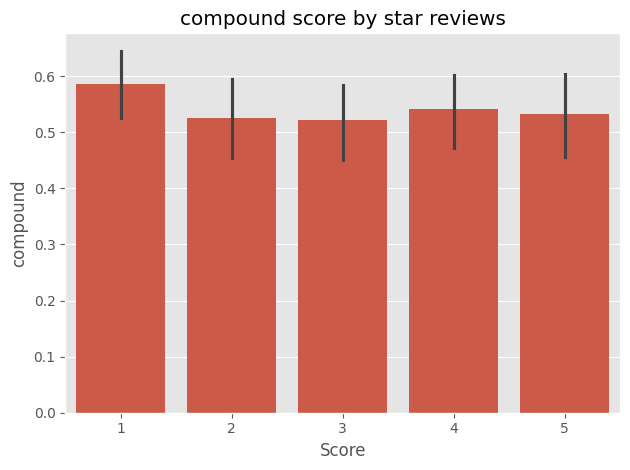

In [46]:
ax=sns.barplot(data=vaders ,x='Score',y='compound')
ax.set_title('compound score by star reviews')
plt.tight_layout()
plt.show

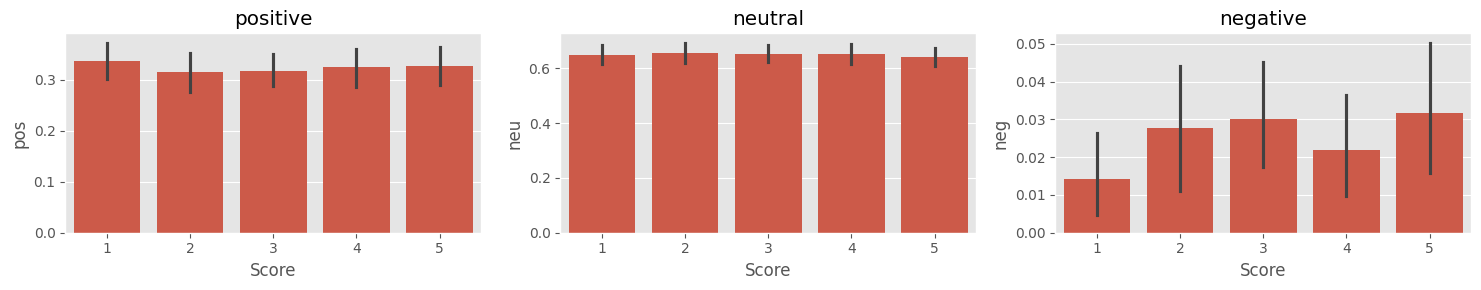

In [47]:
# plotting for postive neutral negative reviews scores

fix, axs=plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negative')
plt.tight_layout()
plt.show()

In [48]:
# roberta pretrained model

In [49]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [50]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [51]:
# vader results for example
print(example)
sia.polarity_scores(example)


The electric toothbrush is a game changer. My teeth have never felt this clean, even after a dentist visit.


{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.481}

In [52]:
# run for roberta model
encoded_txt = tokenizer(example,return_tensors='pt') # pt is pytorch
# Access the 'input_ids' tensor directly
output = model(**encoded_txt)

In [53]:
scores = output[0][0].detach().numpy()

In [54]:
scores_dict ={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': -1.7899592, 'roberta_neu': 0.15182628, 'roberta_pos': 2.1468475}


In [55]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [56]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [57]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


In [59]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.569,0.431,0.8442,0.003922,0.097046,0.899032,PROD611,USER4021,Whitney Solis,0,41,4,2023-02-04 11:34:00,Noticed a difference in a week,Gentle on my gums and perfect for daily use. W...
1,2,0.0,0.819,0.181,0.4767,0.002248,0.041276,0.956477,PROD220,USER6742,Carlos Johnston,13,13,1,2020-04-25 09:42:04,Improved gum health,"My dentist suggested this product, and I can s..."
2,3,0.0,0.837,0.163,0.4810,0.016885,0.117705,0.865410,PROD315,USER5041,Janet Franco,6,29,3,2016-04-16 07:53:21,Keeps breath fresh all day,The electric toothbrush is a game changer. My ...
3,4,0.0,0.794,0.206,0.3818,0.002396,0.054753,0.942852,PROD104,USER1146,Brenda Johnson,1,43,5,2008-09-26 20:18:08,Best toothpaste I've used,Affordable and works as advertised. My teeth f...
4,5,0.0,0.353,0.647,0.8750,0.004634,0.069455,0.925912,PROD382,USER6387,Charles Davis,2,2,1,2013-03-04 23:46:35,Keeps breath fresh all day,Easy to use and leaves my mouth feeling super ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.0,0.837,0.163,0.4810,0.016885,0.117705,0.865410,PROD441,USER2313,Bryan Houston,31,31,4,2018-06-04 16:37:28,Highly recommended by dentists,The electric toothbrush is a game changer. My ...
496,497,0.0,0.357,0.643,0.9118,0.001683,0.035959,0.962358,PROD349,USER6360,Samantha Fox,7,7,2,2018-06-12 23:16:34,Cleans teeth effectively,Natural ingredients make it safe and effective...
497,498,0.0,0.837,0.163,0.4810,0.016885,0.117705,0.865410,PROD964,USER5847,Sharon Taylor,19,19,1,2009-08-07 22:14:25,Perfect for sensitive teeth,The electric toothbrush is a game changer. My ...
498,499,0.0,0.357,0.643,0.9118,0.001683,0.035959,0.962358,PROD219,USER2534,Brianna Davis,3,3,4,2011-01-10 05:13:20,Great value for money,Natural ingredients make it safe and effective...


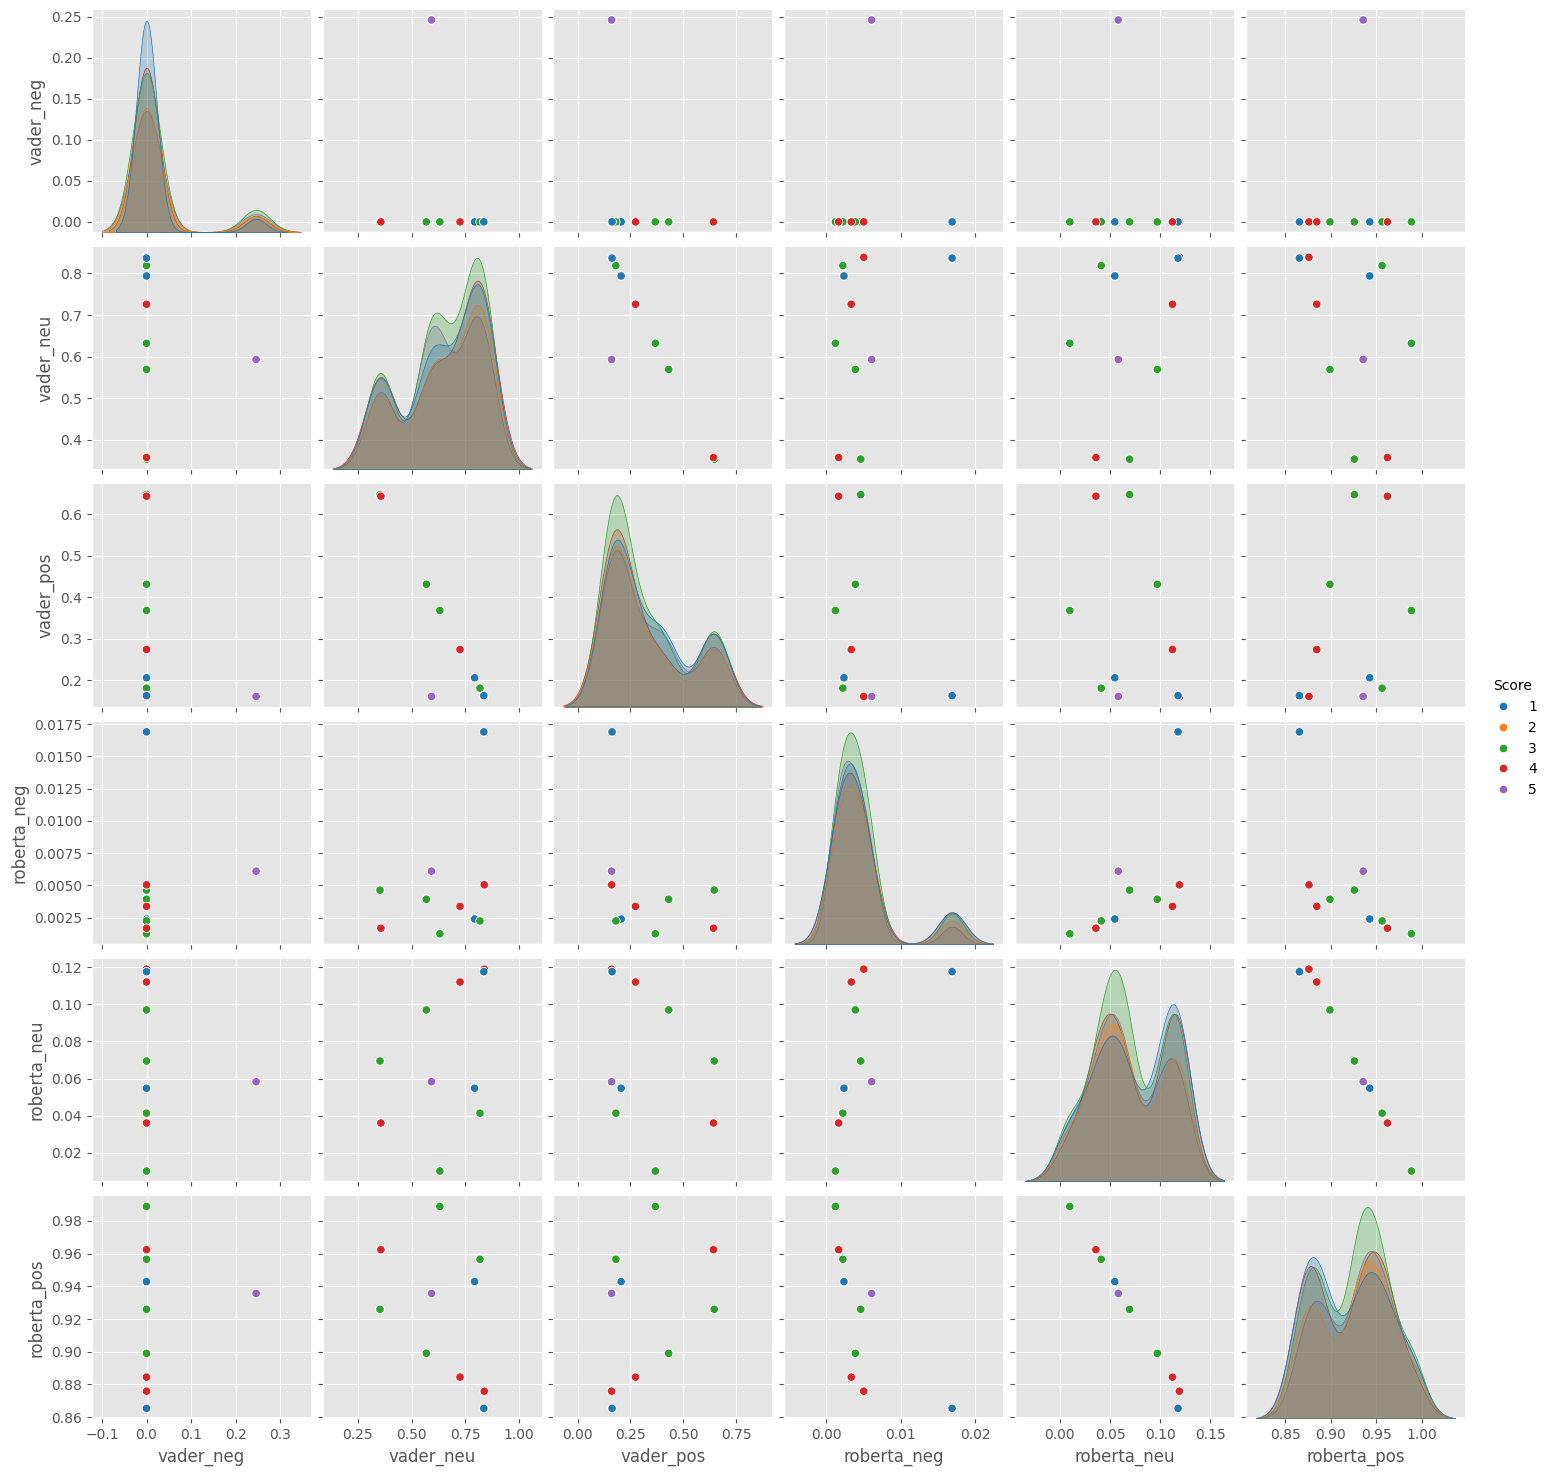

In [60]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

**Positive 1-Star and Negative 5-Star Reviews**

In [61]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'This toothpaste has greatly improved my dental health. I love the minty flavor and how fresh my mouth feels after brushing.'

In [62]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Easy to use and leaves my mouth feeling super clean.'

# **negative sentiment 5-Star view**

In [63]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'The electric toothbrush is a game changer. My teeth have never felt this clean, even after a dentist visit.'

In [64]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'This product has been a lifesaver for my sensitive teeth. No more pain with hot or cold drinks.'

**The Transformers Pipeline**

**Quick & easy way to run sentiment predictions**

In [65]:
from transformers import pipeline
import torch

sent_pipeline =pipeline(
        "sentiment-analysis",
        model="distilbert-base-uncased-finetuned-sst-2-english",
        revision="714eb0f",
        device=0
    )

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [66]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [67]:
sent_pipeline('NVidi stocks are decreasing i lose my moeny ')

[{'label': 'NEGATIVE', 'score': 0.999649167060852}]

In [68]:
sent_pipeline('Covid-19 virus is spreading but patients are surviving too')

[{'label': 'NEGATIVE', 'score': 0.9522424936294556}]

**Aspect Based Sentiment Analysis**
**Customers Satisfaction | Performance, Pricing**

In [69]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
absa_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function for Aspect-Based Sentiment Analysis
def aspect_based_sentiment(reviews, aspects):
    results = []
    for review in reviews:
        review_results = {"review": review, "aspects": {}}
        for aspect in aspects:
            aspect_text = f"{aspect}: {review}"
            sentiment = absa_pipeline(aspect_text)[0]
            review_results["aspects"][aspect] = {"label": sentiment['label'], "score": sentiment['score']}
        results.append(review_results)
    return results

# Example usage
reviews = [
    "The durability of this product is fantastic, but the performance could be better.",
    "I love the pricing and quality, but I'm unhappy with the customer support."
]
aspects = ["durability", "performance", "pricing", "customer support"]

absa_results = aspect_based_sentiment(reviews, aspects)
for result in absa_results:
    print(result)



config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


{'review': 'The durability of this product is fantastic, but the performance could be better.', 'aspects': {'durability': {'label': '3 stars', 'score': 0.5765416026115417}, 'performance': {'label': '3 stars', 'score': 0.5707290172576904}, 'pricing': {'label': '3 stars', 'score': 0.5732274055480957}, 'customer support': {'label': '3 stars', 'score': 0.5188279747962952}}}
{'review': "I love the pricing and quality, but I'm unhappy with the customer support.", 'aspects': {'durability': {'label': '3 stars', 'score': 0.6066485643386841}, 'performance': {'label': '3 stars', 'score': 0.6091908812522888}, 'pricing': {'label': '3 stars', 'score': 0.5775260329246521}, 'customer support': {'label': '3 stars', 'score': 0.5616716146469116}}}


In [71]:
!pip install transformers yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.9 MB/s eta 0:00:00


**Keywords Extraction**
| Remove Stopwords

In [72]:
import yake

# Initialize a keyword extractor
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
num_of_keywords = 10

keyword_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=num_of_keywords
)

# Function to extract keywords from reviews
def extract_keywords(reviews):
    results = []
    for review in reviews:
        keywords = keyword_extractor.extract_keywords(review)
        results.append({"review": review, "keywords": [keyword[0] for keyword in keywords]})
    return results

# Example usage
keyword_results = extract_keywords(reviews)
for result in keyword_results:
    print(result)


{'review': 'The durability of this product is fantastic, but the performance could be better.', 'keywords': ['product is fantastic', 'fantastic', 'durability', 'product', 'performance']}
{'review': "I love the pricing and quality, but I'm unhappy with the customer support.", 'keywords': ['pricing and quality', 'customer support', 'love the pricing', 'quality', 'support', 'love', 'pricing', 'unhappy', 'customer']}


**Topic Modeling**

A statistical method
NMF - Non negative matrix factorization

1) remove stopwords
2) create document term matrix TF_IDF
3)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# Assuming `reviews` is the column containing cleaned review text
# Step 1: Generate TF-IDF Matrix
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit features for efficiency
    stop_words='english',
    max_df=0.95,  # Ignore terms that appear in more than 95% of documents
    min_df=2  # Ignore terms that appear in fewer than 2 documents
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])  # Replace df['Text'] with your review column

# Step 2: Apply NMF
nmf_model = NMF(n_components=5, random_state=42)  # Specify the number of topics
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Step 3: Extract and Display Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, no_top_words)

# Output: Topics with their top keywords


Topic 1:
visit, game, changer, toothbrush, felt, electric, dentist, clean, teeth, significantly
Topic 2:
effective, saw, results, days, highly, whitening, teeth, make, safe, great
Topic 3:
use, easy, super, leaves, feeling, gums, daily, perfect, recommend, sensitivity
Topic 4:
improved, health, fresh, toothpaste, greatly, brushing, flavor, feels, love, dental
Topic 5:
sensitive, cold, drinks, hot, lifesaver, pain, teeth, product, works, affordable


In [76]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [78]:
# prompt: try to save all modellikenmf model results ,yake model keyword extraction resuult , aspect based results, vader , robert scores , postitive negative neutral scores in a csv  results

import pandas as pd

# Assuming 'results_df' is your DataFrame containing all the results
# and 'df' is the original DataFrame with the 'Text' column

# Create a new DataFrame to store the combined results
all_results_df = pd.DataFrame()

# Add the existing columns from results_df to the new DataFrame
all_results_df = pd.concat([all_results_df, results_df], axis=1)

# Extract keywords using YAKE
keyword_results = extract_keywords(df['Text'].tolist())  # Assuming 'Text' column contains reviews

# Convert keyword results to DataFrame
keywords_df = pd.DataFrame(keyword_results)
keywords_df = pd.concat([keywords_df.drop(['keywords'], axis=1), keywords_df['keywords'].apply(pd.Series)], axis=1)
keywords_df = keywords_df.add_prefix('keyword_')


# Add keyword columns to all_results_df
all_results_df = pd.concat([all_results_df, keywords_df], axis=1)

# Perform aspect-based sentiment analysis
aspects = ["durability", "performance", "pricing", "customer support"] # Or any other relevant aspects
absa_results = aspect_based_sentiment(df['Text'].tolist(), aspects)

# Convert aspect-based sentiment analysis results to DataFrame
absa_df = pd.DataFrame(absa_results)
# Flatten the 'aspects' column
absa_df = pd.concat([absa_df.drop(['aspects'], axis=1), absa_df['aspects'].apply(pd.Series)], axis=1)
# **REPLACE THESE LINES WITH THE FOLLOWING:**
absa_exploded = absa_df.add_prefix('absa_') # Directly adding prefix to the absa_df columns

# Add aspect-based sentiment analysis results to all_results_df
all_results_df = pd.concat([all_results_df, absa_exploded], axis=1)

# Save the combined DataFrame to a CSV file
all_results_df.to_csv('all_model_results.csv', index=False)